In [71]:
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import html5lib
import requests
from openpyxl import Workbook
from datetime import datetime
import webbrowser
import os

In [72]:
path = '../process_tables_GBDC_Investment.xlsx'
xls = pd.ExcelFile(path)
all_sheets = pd.read_excel(path, sheet_name=None)

In [73]:
dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df
    print(f"DataFrame name: {sheet_name} : {sheet_df.shape}")

DataFrame name: March_31_2013 : (421, 17)
DataFrame name: June_30_2013 : (428, 27)
DataFrame name: September_30_2013 : (470, 19)
DataFrame name: December_31_2013 : (439, 26)
DataFrame name: March_31_2014 : (459, 24)
DataFrame name: June_30_2014 : (474, 22)
DataFrame name: September_30_2014 : (519, 18)
DataFrame name: December_31_2014 : (495, 22)
DataFrame name: March_31_2015 : (514, 20)
DataFrame name: June_30_2015 : (557, 20)
DataFrame name: September_30_2015 : (573, 19)
DataFrame name: December_31_2015 : (174, 23)
DataFrame name: March_31_2016 : (578, 19)
DataFrame name: June_30_2016 : (199, 20)
DataFrame name: September_30_2016 : (680, 22)
DataFrame name: December_31_2016 : (639, 20)
DataFrame name: March_31_2017 : (668, 20)
DataFrame name: June_30_2017 : (693, 20)
DataFrame name: December_31_2017 : (724, 22)
DataFrame name: March_31_2018 : (759, 22)
DataFrame name: June_30_2018 : (797, 22)
DataFrame name: September_30_2018 : (875, 23)
DataFrame name: December_31_2018 : (905, 23)
Da

In [74]:
for dataframe in dataframes:
    # print(dataframe, ':',
    #       dataframes[dataframe].loc[dataframes[dataframe].shape[0]-1][0])
    if dataframes[dataframe].shape[0]-1 < 250:
        print(
            dataframe, ':', dataframes[dataframe].shape[0]-1)

December_31_2015 : 173
June_30_2016 : 198


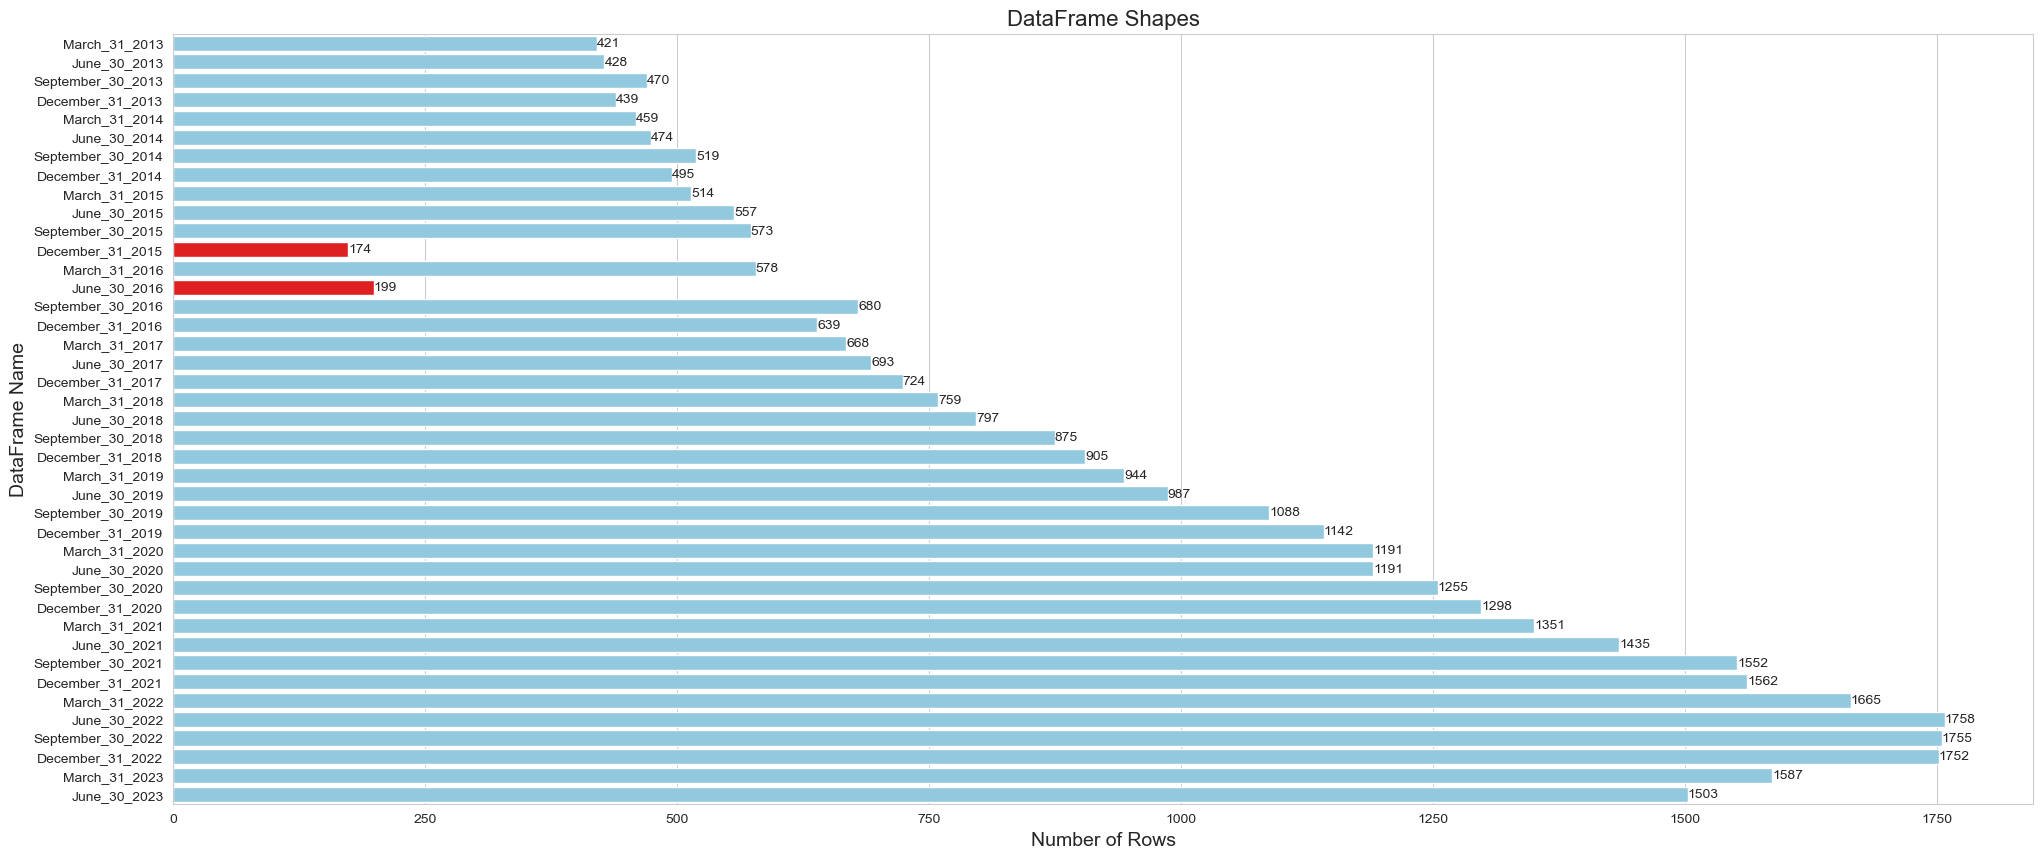

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df

# Extract DataFrame names and shapes
df_names = []
df_shapes = []
for sheet_name, sheet_df in dataframes.items():
    df_names.append(sheet_name)
    df_shapes.append(sheet_df.shape)

# Create a bar graph with Seaborn
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")

# Create a Seaborn barplot
sns.barplot(x=[shape[0] for shape in df_shapes], y=df_names, palette=[
    'red' if shape[0] < 250 else 'skyblue' for shape in df_shapes])

# Customize the appearance of bars
for i, shape in enumerate(df_shapes):
    width = shape[0]
    plt.text(width, i, f'{int(width)}', ha='left', va='center')

# Adjust font size
plt.xlabel('Number of Rows', fontsize=14)
plt.ylabel('DataFrame Name', fontsize=14)
plt.title('DataFrame Shapes', fontsize=16)

plt.show()

In [76]:
def process_table_fun(soi_table_df, process_tables_shapes):
    print(1, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace(r'^\s*\$\s*$', np.nan, regex=True)
    print(2, 'shape:', soi_table_df.shape)
    # fewer non-null values, effectively dropping rows with more than 100 non-null values.
    for index, row in soi_table_df.iterrows():
        if row.count() > 100:
            soi_table_df = soi_table_df.drop(index)
    print(0, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=1)
    print(3, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=0)
    print(4, 'shape:', soi_table_df.shape)
    soi_table_df.dropna()
    print(5, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.rename(
        columns=soi_table_df.iloc[0]).drop(soi_table_df.index[0])
    print(6, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace('—', 0, regex=False)
    print(7, 'shape:', soi_table_df.shape)
    process_tables_shapes.append(soi_table_df.shape)
    return soi_table_df


# df = dataframes['June_30_2021']
# process_table = process_table_fun(df)
# process_table.to_csv("process_table.csv")
# process_table

In [77]:
# for _ in range(len(process_table.columns)):
#     print(process_table.iloc[:, _].unique())

In [78]:
process_tables = {}
process_tables_shape = []
for dataframe in dataframes:
    print(dataframe)
    process_tables[dataframe] = process_table_fun(
        dataframes[dataframe], process_tables_shape)
    print('\n')

March_31_2013
1 shape: (421, 17)
2 shape: (421, 17)
0 shape: (421, 17)
3 shape: (421, 17)
4 shape: (421, 17)
5 shape: (421, 17)
6 shape: (420, 17)
7 shape: (420, 17)


June_30_2013
1 shape: (428, 27)
2 shape: (428, 27)
0 shape: (428, 27)
3 shape: (428, 27)
4 shape: (428, 27)
5 shape: (428, 27)
6 shape: (427, 27)
7 shape: (427, 27)


September_30_2013
1 shape: (470, 19)
2 shape: (470, 19)
0 shape: (470, 19)
3 shape: (470, 19)
4 shape: (470, 19)
5 shape: (470, 19)
6 shape: (469, 19)
7 shape: (469, 19)


December_31_2013
1 shape: (439, 26)
2 shape: (439, 26)
0 shape: (439, 26)
3 shape: (439, 26)
4 shape: (439, 26)
5 shape: (439, 26)
6 shape: (438, 26)
7 shape: (438, 26)


March_31_2014
1 shape: (459, 24)
2 shape: (459, 24)
0 shape: (459, 24)
3 shape: (459, 24)
4 shape: (459, 24)
5 shape: (459, 24)
6 shape: (458, 24)
7 shape: (458, 24)


June_30_2014
1 shape: (474, 22)
2 shape: (474, 22)
0 shape: (474, 22)
3 shape: (474, 22)
4 shape: (474, 22)
5 shape: (474, 22)
6 shape: (473, 22)
7 shape:

In [79]:
df = (process_tables['September_30_2015'])
df = dataframes['September_30_2015']
df.to_csv('test.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Assets       519 non-null    object 
 1   Unnamed: 1   12 non-null     object 
 2   Unnamed: 2   448 non-null    object 
 3   Unnamed: 3   12 non-null     object 
 4   Unnamed: 4   12 non-null     object 
 5   Unnamed: 5   331 non-null    object 
 6   Unnamed: 6   14 non-null     object 
 7   Unnamed: 7   12 non-null     object 
 8   Unnamed: 8   213 non-null    object 
 9   Unnamed: 9   310 non-null    object 
 10  Unnamed: 10  12 non-null     object 
 11  Unnamed: 11  308 non-null    object 
 12  Unnamed: 12  12 non-null     object 
 13  Unnamed: 13  320 non-null    float64
 14  Unnamed: 14  442 non-null    object 
 15  Unnamed: 15  262 non-null    float64
 16  Unnamed: 16  16 non-null     object 
 17  Unnamed: 17  379 non-null    object 
 18  Unnamed: 18  1 non-null      object 
dtypes: float

In [81]:
# for _ in range(len(df.columns)):
#     print('')
#     print(df.iloc[:, _].unique())

In [82]:
x = [1, 2, 2, 34, 23, 23, 4, 45, 24, 3, 34, 3]
y = [2, 2, 3, 34, 21, 44, 5, 65, 34, 3, 23, 4]

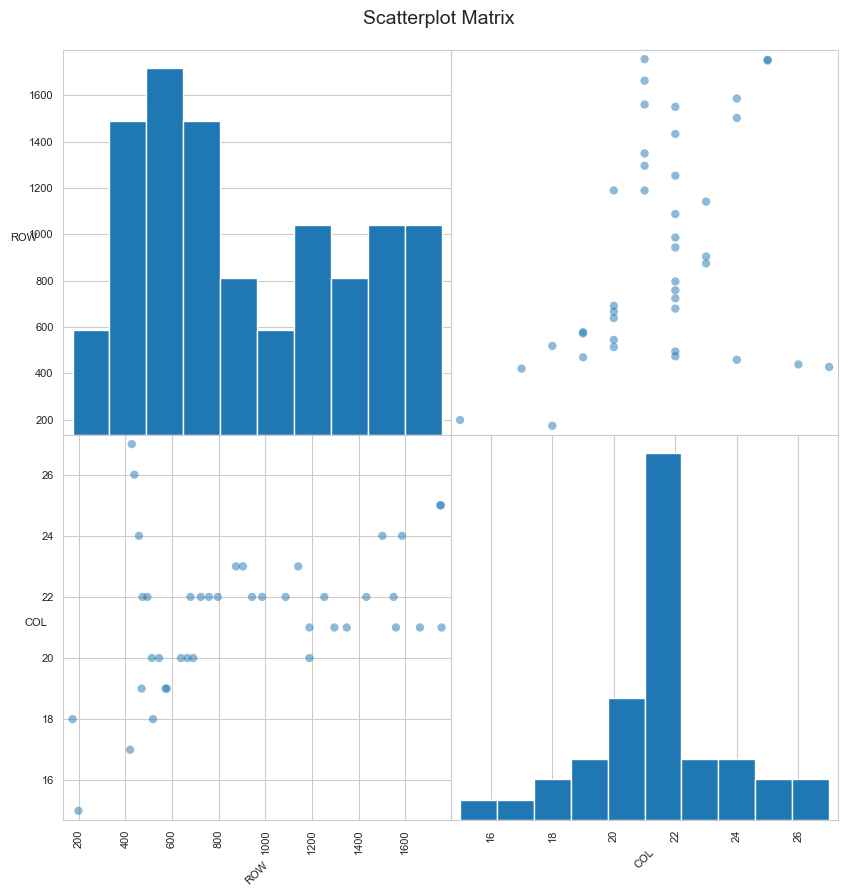

In [83]:
data = pd.DataFrame(process_tables_shape, columns=["ROW", "COL"])
scatter_matrix = pd.plotting.scatter_matrix(
    data, alpha=0.5, figsize=(10, 10), diagonal='hist', marker='o')

# Add labels to the subplots
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=0)

plt.suptitle('Scatterplot Matrix', y=0.92, fontsize=14)

plt.show()

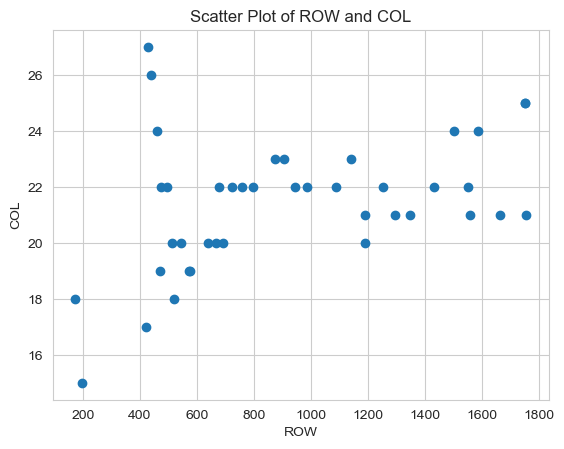

In [84]:
x = [point[0] for point in process_tables_shape]
y = [point[1] for point in process_tables_shape]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('ROW')
plt.ylabel('COL')
plt.title('Scatter Plot of ROW and COL')

# Show the plot
plt.show()